In [1]:
import numpy as np
import patsy

import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils
mpl_stylesheet.banskt_presentation(splinecolor = 'black')

import special_plots
import special_data
from gradvi.tests import toy_data
from gradvi.models import basis_matrix as gvbm

### Generate data using B-splines and map to trendfiltering basis function

### Zeroth degree, first order

Signal-to-noise ratio: 251.801


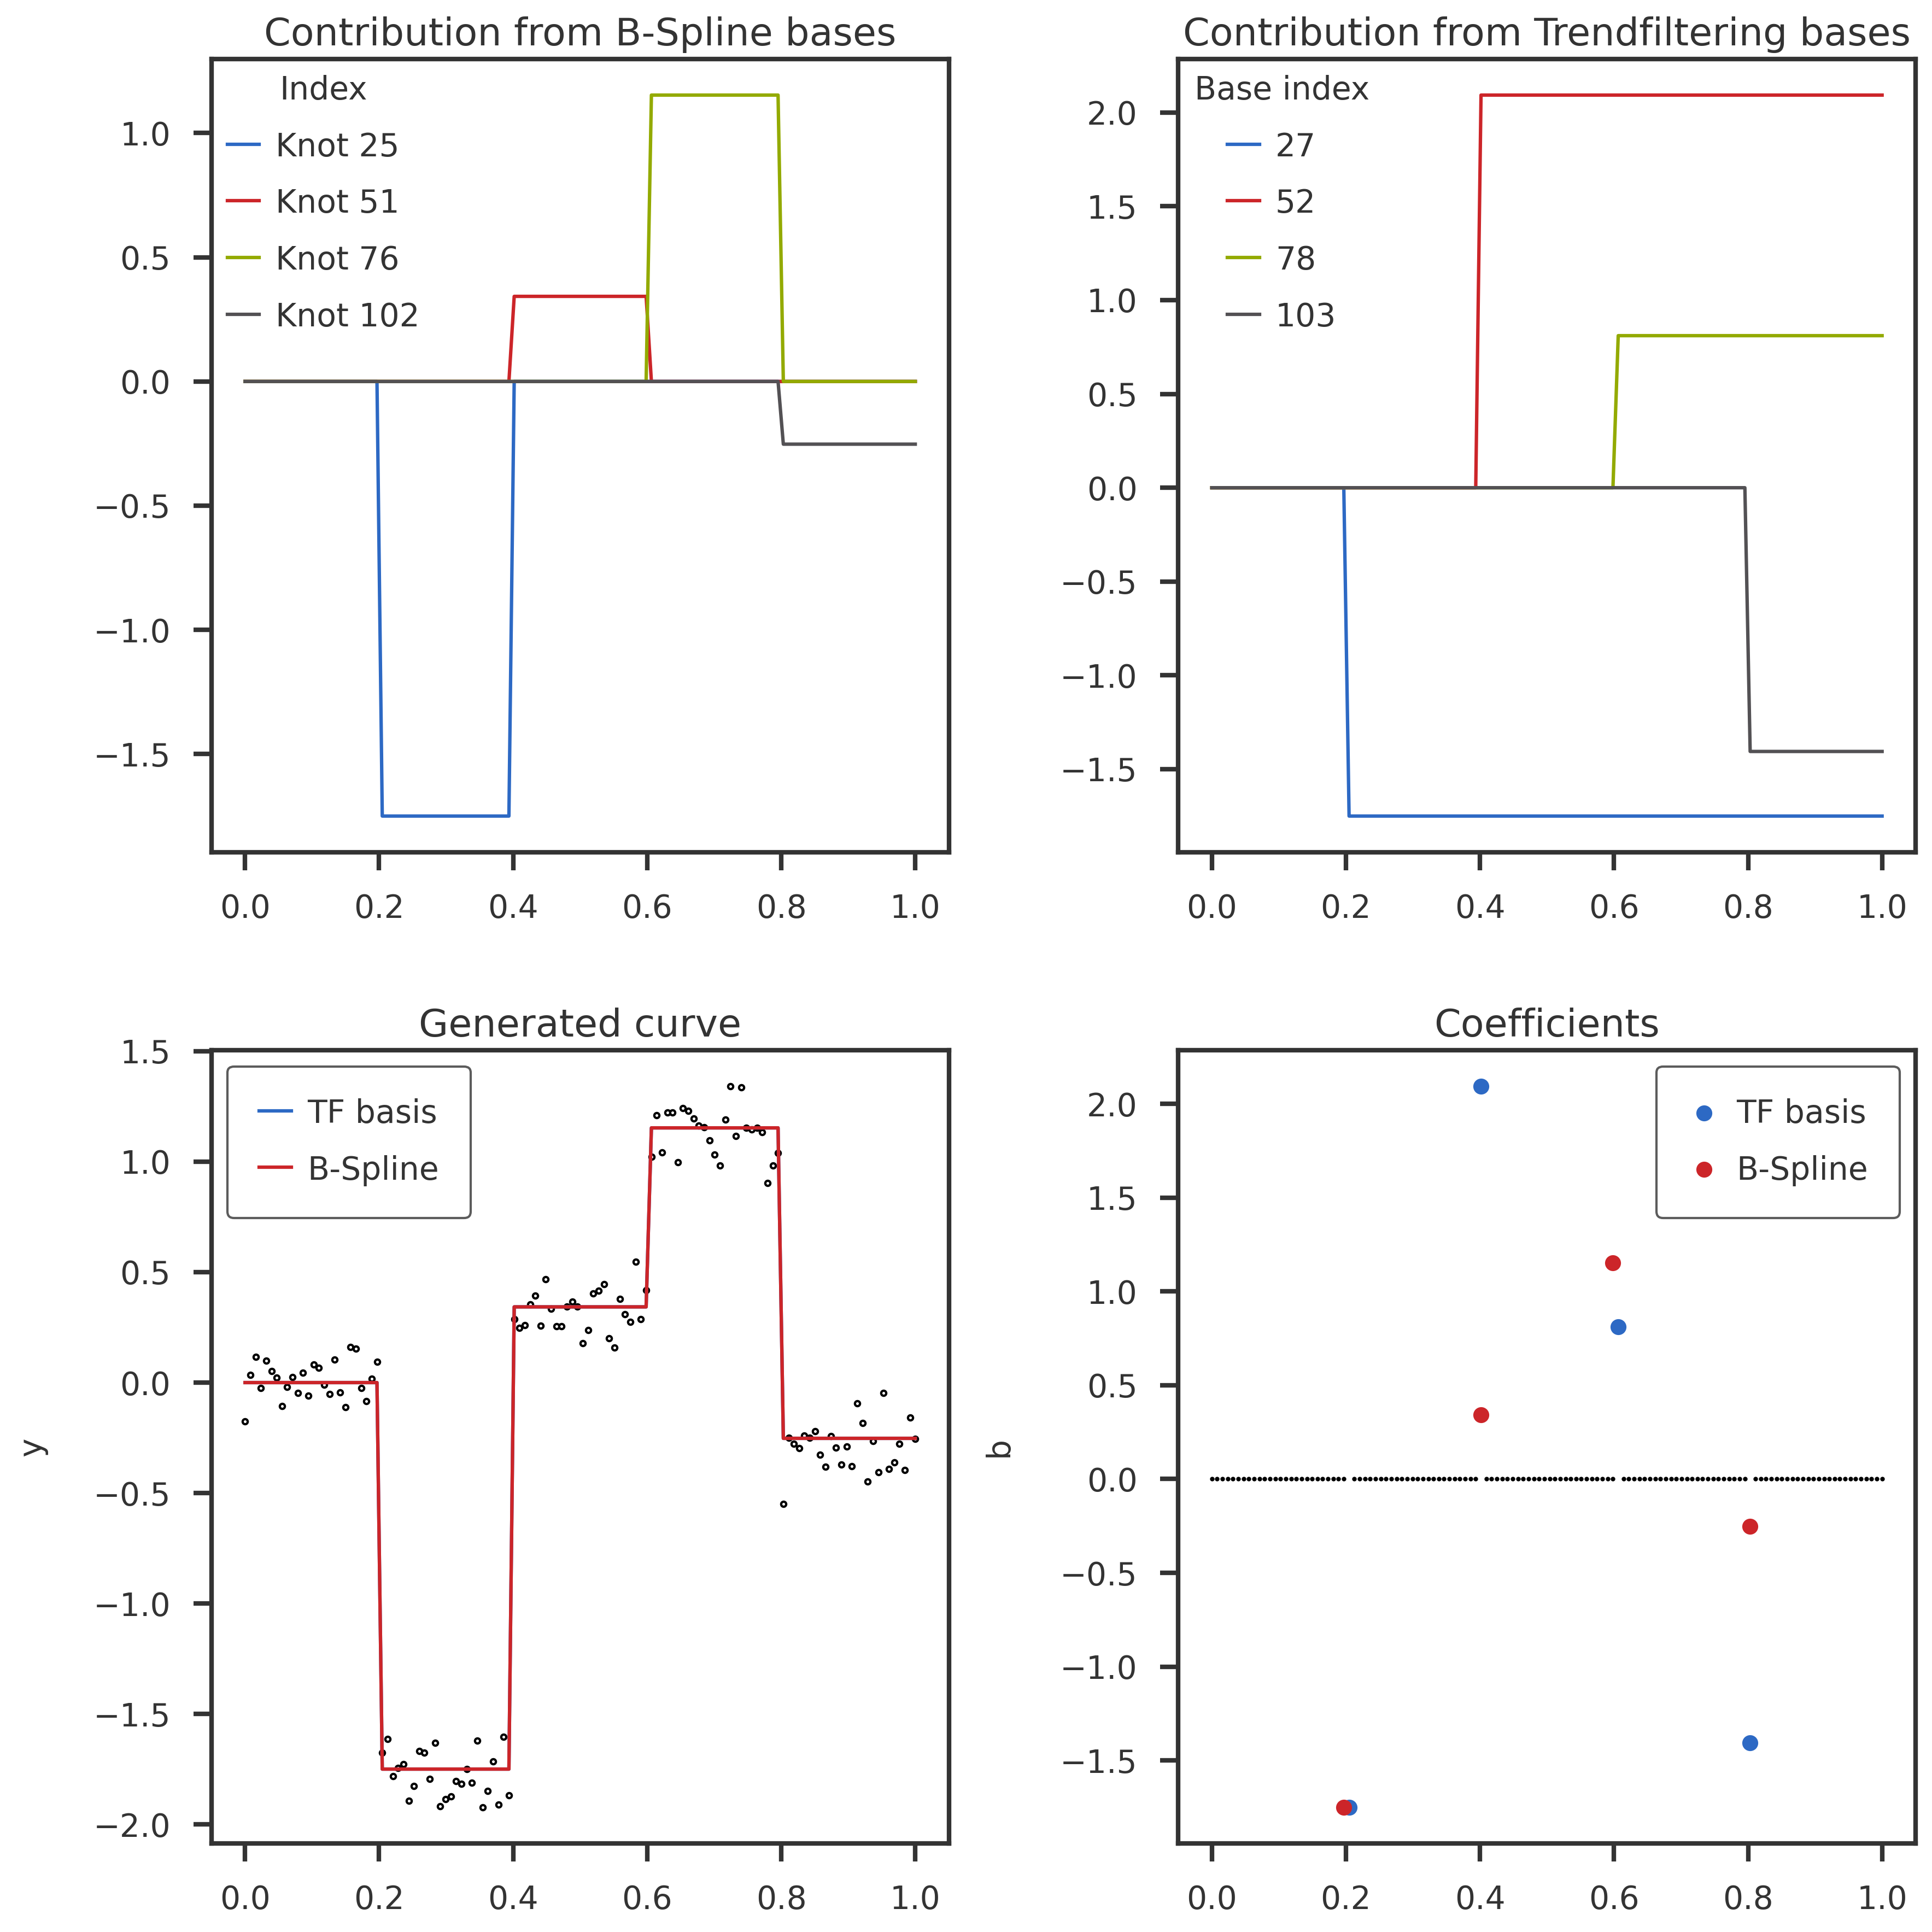

In [2]:
n = 128
x = np.linspace(0, 1, n)
np.random.seed(100)

# Zeroth degree trendfiltering
k = 4
degree = 0
strue = 0.1
include_intercept = False
knots = np.linspace(0, 1, k+2)[1:-1]
bfix = np.random.normal(0, 1, size = k + degree)

data = toy_data.changepoint_from_bspline(x, knots, strue, degree = degree, 
                                         signal = "fixed", bfix = bfix,
                                         seed = 100, include_intercept = include_intercept,
                                         get_bsplines = True, eps = 1e-4)

print(f"Signal-to-noise ratio: {data.snr:.3f}")

fig = plt.figure(figsize = (12, 12))
axlist = [fig.add_subplot(2,2,i+1) for i in range(4)]
special_plots.plot_data_from_bspline(axlist, data.x, data.y, knots, data.degree, 
                                     data.bspline_bases, data.bspline_beta, 
                                     data.H, data.btrue)
plt.tight_layout()
plt.subplots_adjust(hspace = 0.25)
plt.show()

### First degree, second order 

Signal-to-noise ratio: 0.229


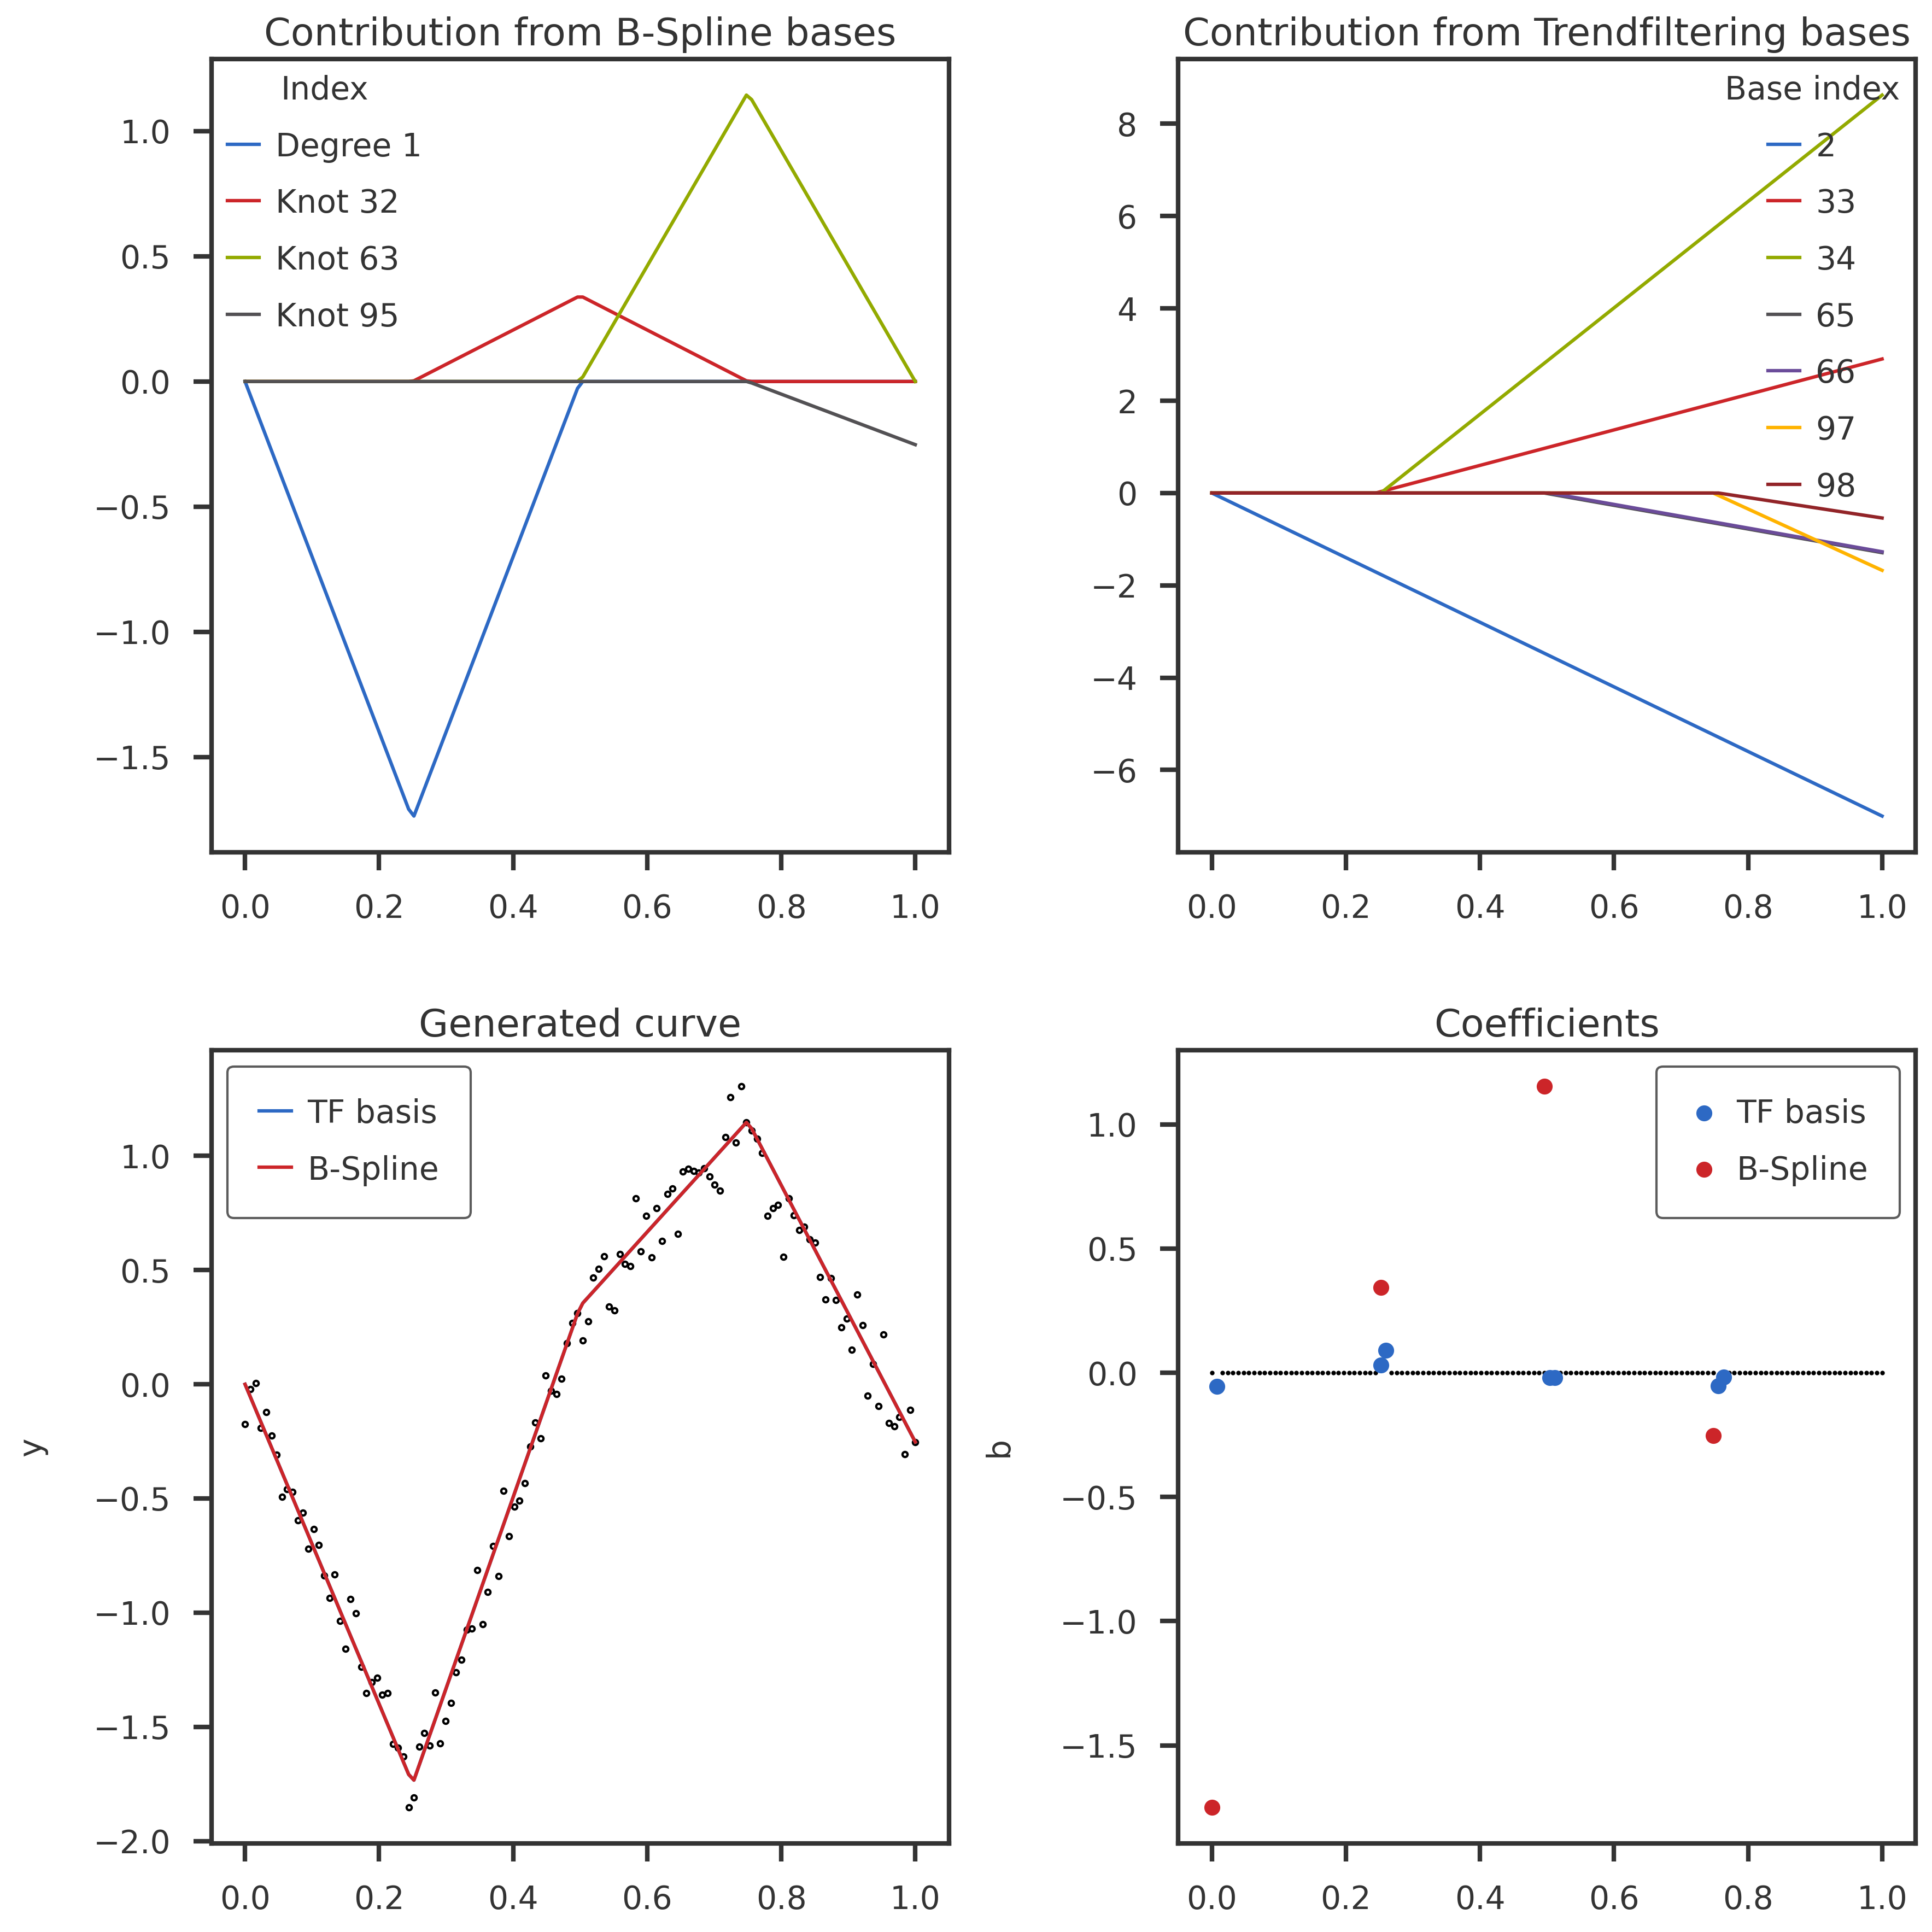

In [3]:
n = 128
x = np.linspace(0, 1, n)
np.random.seed(100)

# Linear trendfiltering
k = 3
degree = 1
strue = 0.1
include_intercept = False
knots = np.linspace(0, 1, k+2)[1:-1]
bfix = np.random.normal(0, 1, size = k + degree)

data = toy_data.changepoint_from_bspline(x, knots, strue, degree = degree, 
                                         signal = "fixed", bfix = bfix,
                                         seed = 100, include_intercept = include_intercept,
                                         get_bsplines = True, eps = 1e-4)
print(f"Signal-to-noise ratio: {data.snr:.3f}")

fig = plt.figure(figsize = (12, 12))
axlist = [fig.add_subplot(2,2,i+1) for i in range(4)]
special_plots.plot_data_from_bspline(axlist, data.x, data.y, knots, data.degree, 
                                     data.bspline_bases, data.bspline_beta, 
                                     data.H, data.btrue)
plt.tight_layout()
plt.subplots_adjust(hspace = 0.25)
plt.show()

### Third degree, fourth order, cubic spline

In [ ]:
n = 128
x = np.linspace(0, 1, n)
np.random.seed(100)

# Hills example
x = np.linspace(0, n-1, n)
k = 6
degree = 3
strue = 0.3
include_intercept = False
knots = special_data.hills_knots(n, 2, 4)# / n
bfix = np.array([1.3, 4.5, -1.9, 10.4, 0.6, 6.7, 0.6, 6.7, 2.6])
# -----------------------

data = toy_data.changepoint_from_bspline(x, knots, strue, degree = degree, 
                                         signal = "fixed", bfix = bfix,
                                         seed = 100, include_intercept = include_intercept,
                                         get_bsplines = True, eps = 1e-4)

print(f"Signal-to-noise ratio: {data.snr:.3f}")

fig = plt.figure(figsize = (12, 12))
axlist = [fig.add_subplot(2,2,i+1) for i in range(4)]
special_plots.plot_data_from_bspline(axlist, data.x, data.y, knots, data.degree, 
                                     data.bspline_bases, data.bspline_beta, 
                                     data.H, data.btrue)
plt.tight_layout()
plt.subplots_adjust(hspace = 0.25)
plt.show()

### Distribution of coefficients for B-spline and Trendfiltering basis functions

How does the distribution of trendfiltering basis function look if the B-spline basis functions are normally distributed? The distribution of the coefficients deviates from the Gaussian distribution.

In [ ]:
n = 1000
x = np.linspace(0, 1, n)
np.random.seed(100)
k = 500

fig = plt.figure(figsize = (12, 12))
axlist = [fig.add_subplot(2,2,i+1) for i in range(4)]
degree = 0
strue = 1.0
include_intercept = False

for i, degree in enumerate([0, 1, 2, 3]):
    knots = np.linspace(degree, n, k+2)[1:-1] / n
    bfix = np.random.normal(0, 1, size = k + degree)
    data = toy_data.changepoint_from_bspline(x, knots, strue, degree = degree, 
                                             signal = "fixed", bfix = bfix,
                                             seed = 100, include_intercept = include_intercept,
                                             get_bsplines = True, eps = 1e-4)
    
    axlist[i].set_title(f"Degree {data.degree}")
    axlist[i].hist(data.btrue[data.btrue!=0], density = True)

plt.tight_layout()
plt.subplots_adjust(hspace = 0.25)
plt.show()